#**Tennis Match Winner Predictor Using Logistic Regression**

The goal of this exercise is to predict the winner of a tennis match using Logistic Regression. It's a binary classification as there are only two possibilities of a winner (Player 1 or Plyaer 2)

The dataset is taken directly from the UCIML repository. It has 608 rows and 42 features with only 3 categorical columns ->

**Tournament_Name, Player1_Name and Player2_Name**

This Dataset is a compilation of all major tennis opens played in 2013 both in men's and women's category

Some of the features that I found of interest in my initial analysis were Breakpoints Won, No of Aces, No of Double Faults.

One feature that is missing and could be a higly strong predictor is the ATP ranking of the tennis player. Generally in tennis all major tournaments are dominated by high ranked players.

In [ ]:
import pandas as pd
!pip install ucimlrepo

Data is a compilation of all major tennis opens played in 2013 both in men's and women's category

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
tennis_major_tournament_match_statistics = fetch_ucirepo(id=300)

# data (as pandas dataframes)
X = tennis_major_tournament_match_statistics.data.features
y = tennis_major_tournament_match_statistics.data.targets

# metadata
print(tennis_major_tournament_match_statistics.metadata)

# variable information
print(tennis_major_tournament_match_statistics.variables)

#Data has 608 rows and 42 features


{'uci_id': 300, 'name': 'Tennis Major Tournament Match Statistics', 'repository_url': 'https://archive.ics.uci.edu/dataset/300/tennis+major+tournament+match+statistics', 'data_url': 'https://archive.ics.uci.edu/static/public/300/data.csv', 'abstract': 'This is a collection of 8 files containing the match statistics for both women and men at the four major tennis tournaments of the year 2013. Each file has 42 columns and a minimum of 76 rows.', 'area': 'Other', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 127, 'num_features': 42, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Result'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C54C7K', 'creators': ['Shruti Jauhari', 'Aniket Morankar', 'Ernest Fokoue'], 'intro_paper': None, 'additional_info': {'summary': 'N/A', 'purp

| Column              | Description                                                   |
| ------------------- | ------------------------------------------------------------- |
| `Tournament`        | Name of the tournament (e.g., Australian Open, Wimbledon)     |
| `Player1`           | Name or ID of Player 1                                        |
| `Player2`           | Name or ID of Player 2                                        |
| `Round`             | Tournament round (numerically encoded, e.g., 1 = first round) |
| `Result`            | Target variable: 1 if Player 1 wins, 0 otherwise              |
| **Player 1 stats:** |                                                               |
| `FSP.1`             | First Serve Percentage (real number)                          |
| `FSW.1`             | First Serve Won percentage (real)                             |
| `SSP.1`             | Second Serve Percentage (real)                                |
| `SSW.1`             | Second Serve Won percentage (real)                            |
| `ACE.1`             | Number of aces served by Player 1 (integer)                   |
| `DBF.1`             | Number of double faults by Player 1 (integer)                 |
| `WNR.1`             | Number of winners by Player 1 (numeric)                       |
| `UFE.1`             | Unforced errors committed by Player 1 (numeric)               |
| `BPC.1`             | Break Points Created by Player 1 (numeric)                    |
| `BPW.1`             | Break Points Won by Player 1 (numeric)                        |
| `NPA.1`             | Net Points Attempted by Player 1 (numeric)                    |
| `NPW.1`             | Net Points Won by Player 1 (numeric)                          |
| `TPW.1`             | Total Points Won by Player 1 (numeric)                        |
| `ST1.1`–`ST5.1`     | Games won by Player 1 in set 1 through set 5 (integer)        |
| `FNL.1`             | Final number of games won by Player 1 in the match (integer)  |
| **Player 2 stats:** | Similar stats for Player 2, with `.2` suffix                  |
| `FSP.2`             | First Serve Percentage (Player 2)                             |
| `FSW.2`             | First Serve Won by Player 2                                   |
| `SSP.2`             | Second Serve Percentage (Player 2)                            |
| `SSW.2`             | Second Serve Won (Player 2)                                   |
| `ACE.2`             | Aces by Player 2                                              |
| `DBF.2`             | Double Faults by Player 2                                     |
| `WNR.2`             | Winners by Player 2                                           |
| `UFE.2`             | Unforced Errors by Player 2                                   |
| `BPC.2`             | Break Points Created by Player 2                              |
| `BPW.2`             | Break Points Won by Player 2                                  |
| `NPA.2`             | Net Points Attempted by Player 2                              |
| `NPW.2`             | Net Points Won by Player 2                                    |
| `TPW.2`             | Total Points Won by Player 2                                  |
| `ST1.2`–`ST5.2`     | Games won by Player 2 in sets 1–5 (integer)                   |
| `FNL.2`             | Final number of games won by Player 2 in the match (integer)  |
| `T_Round`           | Tournament round (duplicate of `Round`, numeric)              |


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


warnings.filterwarnings('ignore')



# Handle categorical features: 'Tournament', 'Player1', 'Player2'
# For simplicity, we will use Label Encoding. One-Hot Encoding could also be used.
categorical_cols = ['Tournament', 'Player1', 'Player2']
for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Handle potential missing values by filling with the mean of each column
X = X.fillna(X.mean())

print(X)
# Convert target variable to a 1D array
y = y.values.ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=325848, stratify=y
)


# Feature Selection using SelectKBest and f_classif
# We'll select the top 15 features as an example
k = 15
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_features_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features_indices]

print(f"Selected {k} features:")
print(selected_feature_names.tolist())

# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Train Logistic Regression model
logreg = LogisticRegression(random_state=5)

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Best model
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

# Make predictions
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nLogistic Regression Model Performance (with Feature Selection):")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

     Tournament  Player1  Player2  Round  FNL1  FNL2  FSP.1  FSW.1  SSP.1  \
0             0      267      331      1   0.0   3.0     61     35     39   
1             0      261       33      1   3.0   0.0     61     31     39   
2             0      298      109      1   0.0   3.0     52     53     48   
3             0      108      313      1   3.0   0.0     53     39     47   
4             0      210      132      1   1.0   3.0     76     63     24   
..          ...      ...      ...    ...   ...   ...    ...    ...    ...   
938           3       13      324      5   2.0   1.0     77     52     23   
939           3      395      229      5   2.0   0.0     59     26     41   
940           3      274      228      6   2.0   0.0     61     21     39   
941           3      395       25      6   2.0   1.0     63     53     37   
942           3      395      272      7   0.0   2.0     65     22     35   

     SSW.1  ...  BPC.2  BPW.2      NPA.2      NPW.2       TPW.2  ST1.2  ST2

Precision = 0.99 → .01 of predcitions for either player 1 or 2 were wrong

Recall = 1.00 → It caught all actual Player1 and Player2 wins.

F1-score = 0.99 → Shows a balance between Precision and Recall (quite strong means no bias)

Support = Player 1 wins 96 of all matches and Player 2 wins 93 matches (all correct predictions)

<Figure size 600x400 with 0 Axes>

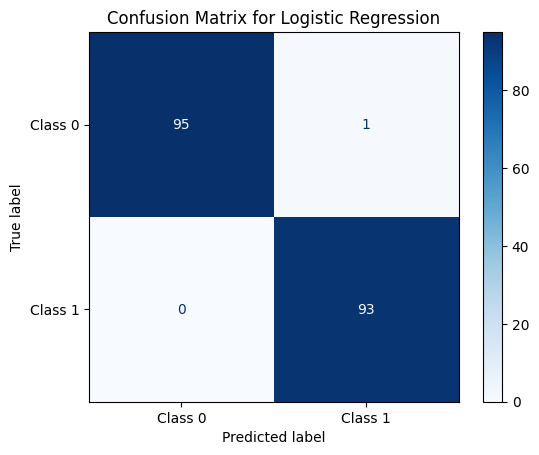

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.grid(False)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg_model, X_train_scaled, y_train, cv=45)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.9986928104575162


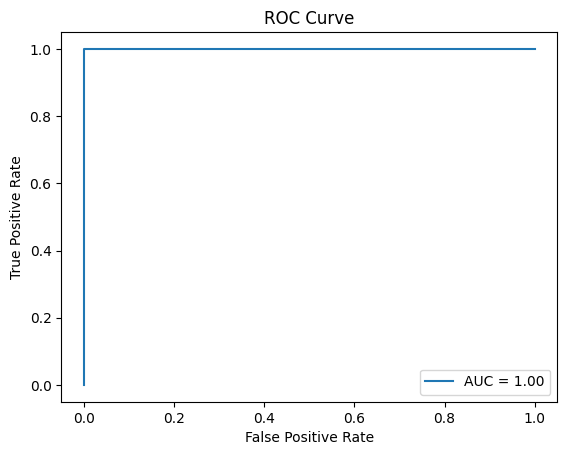

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, logreg_model.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Step 1: Feature selection
k = 15  # or however many top features you want
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features_indices]

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Step 3: Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Step 4: Extract feature importance
coefficients = logreg_model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': selected_feature_names,
    'Coefficient': coefficients,
    'Importance (abs)': np.abs(coefficients)
})

# Step 5: Sort and display
feature_importance_sorted = feature_importance.sort_values(by='Importance (abs)', ascending=False)
print("Top Predictors (most decisive first):")
print(feature_importance_sorted)


Top Predictors (most decisive first):
   Feature  Coefficient  Importance (abs)
1     FNL2    -3.543186          3.543186
0     FNL1     3.106146          3.106146
6    ST3.1     0.580079          0.580079
5    ST2.1     0.543803          0.543803
13   ST3.2    -0.362644          0.362644
2    BPC.1     0.360439          0.360439
3    BPW.1     0.313774          0.313774
4    ST1.1     0.312375          0.312375
12   ST2.2    -0.247452          0.247452
11   ST1.2    -0.181707          0.181707
9    BPW.2    -0.169274          0.169274
7    ST4.1     0.156628          0.156628
8    BPC.2    -0.065922          0.065922
14   ST4.2     0.042684          0.042684
10   TPW.2     0.002999          0.002999


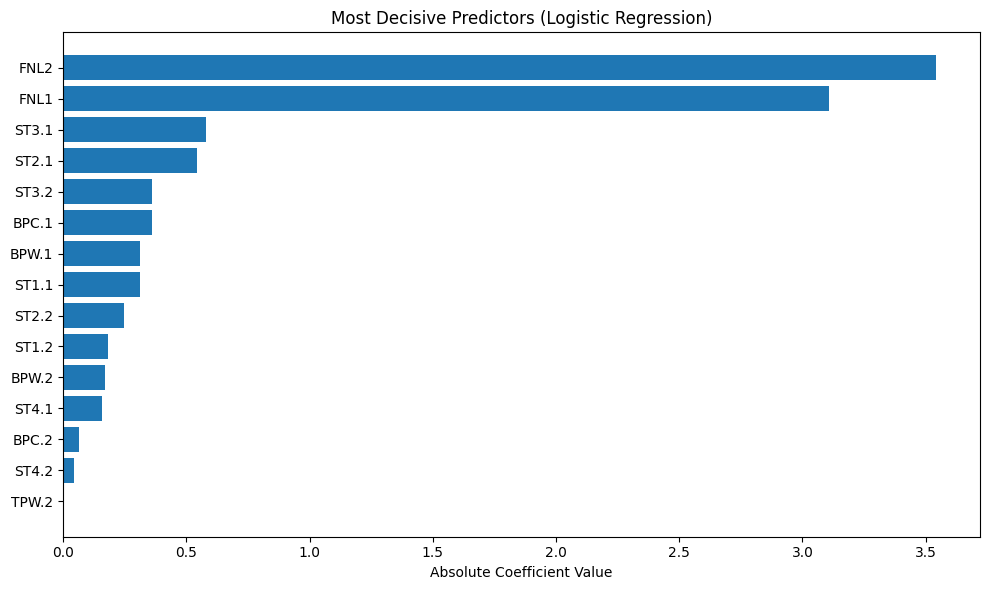

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Importance (abs)'])
plt.xlabel("Absolute Coefficient Value")
plt.title("Most Decisive Predictors (Logistic Regression)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The top 4 fetaures actually do not matter, its like saying the person with more points won.


Final number of games won by Player 2,
Final number of games won by Player 1


ST3.1, ST2.1, ST1.1 – Number of games Player 1 won in sets 1–3.,
ST3.2, ST2.2, ST1.2 – Equivalent set scores for Player 2,

Now these features actually contribute more

BPC.1 / BPW.1 – Break Points Created/Won by Player 1.
BPW.2, BPC.2 – Similar stats for Player 2

So I decided to dive deeper and run another logistic regression by removing these features.

In [ ]:
# List the top 4 features from the plot
top_4_features = ['FNL2', 'FNL1', 'ST3.1', 'ST2.1']

# Drop them from the dataset
X_reduced = X.drop(columns=top_4_features)

from sklearn.model_selection import train_test_split

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Select best k features from reduced set
k = 15  # or adjust based on remaining features
selector_red = SelectKBest(score_func=f_classif, k=k)
X_train_sel = selector_red.fit_transform(X_train_red, y_train_red)
X_test_sel = selector_red.transform(X_test_red)

# Standardize
scaler = StandardScaler()
X_train_scaled_red = scaler.fit_transform(X_train_sel)
X_test_scaled_red = scaler.transform(X_test_sel)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model_red = LogisticRegression(max_iter=1000, random_state=5)
model_red.fit(X_train_scaled_red, y_train_red)

# Predict and evaluate
y_pred_red = model_red.predict(X_test_scaled_red)

print("Accuracy after dropping top 4 features:", accuracy_score(y_test_red, y_pred_red))
print("\nClassification Report:")
print(classification_report(y_test_red, y_pred_red))


Accuracy after dropping top 4 features: 0.9259259259259259

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        96
           1       0.92      0.92      0.92        93

    accuracy                           0.93       189
   macro avg       0.93      0.93      0.93       189
weighted avg       0.93      0.93      0.93       189



<Figure size 600x400 with 0 Axes>

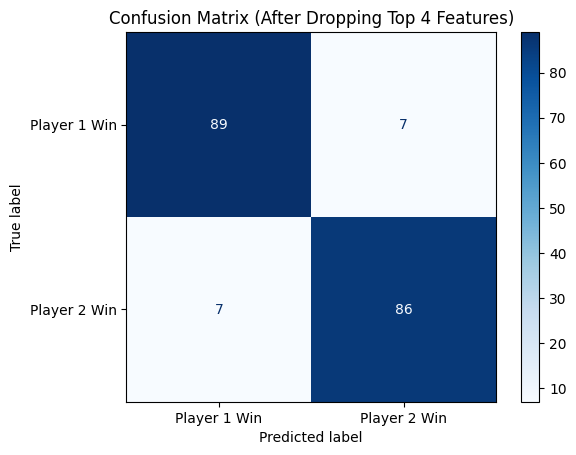

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Player 1 Win", "Player 2 Win"])

# Plot
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (After Dropping Top 4 Features)")
plt.grid(False)
plt.show()


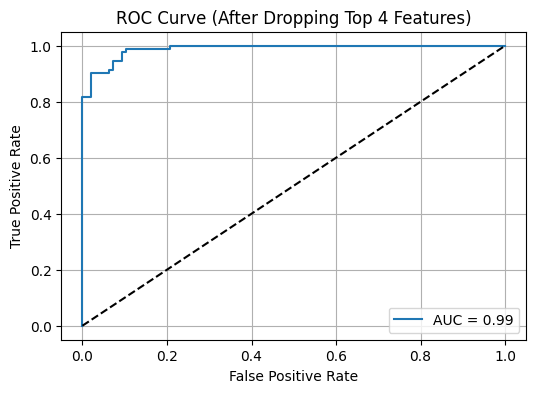

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC
y_prob_red = model_red.predict_proba(X_test_scaled_red)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_red, y_prob_red)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (After Dropping Top 4 Features)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#**Even after removing the top 4 features,  the model results are pretty strong. Which means either the dataset is perfect or its too easy to predict a tennis match.**
